<a href="https://colab.research.google.com/github/Muhammad-Huzifa/Deep_learning_From_Scratch/blob/main/Penguin_Vs_Turtle_Classifaction(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense ,Conv2D , MaxPooling2D , Flatten

In [ ]:
train_ds =tf.keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/DataSet/Penguin VS Turtule M/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)


validation_ds = keras.utils.image_dataset_from_directory(
     directory = '/content/drive/MyDrive/DataSet/Penguin VS Turtule M/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)

)

Found 136 files belonging to 2 classes.
Found 76 files belonging to 2 classes.


In [ ]:
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)


In [ ]:
## Create CNN Model
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 128s 24s/step - accuracy: 0.5050 - loss: 1.9401 - val_accuracy: 0.5526 - val_loss: 0.6661
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 47s 7s/step - accuracy: 0.5763 - loss: 0.6372 - val_accuracy: 0.5658 - val_loss: 0.6046
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 71s 6s/step - accuracy: 0.6745 - loss: 0.5414 - val_accuracy: 0.7632 - val_loss: 0.5577
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 42s 6s/step - accuracy: 0.7584 - loss: 0.4845 - val_accuracy: 0.6974 - val_loss: 0.5945
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 46s 7s/step - accuracy: 0.8006 - loss: 0.4229 - val_accuracy: 0.7895 - val_loss: 0.5630
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 34s 6s/step - accuracy: 0.8614 - loss: 0.3354 - val_accuracy: 0.8026 - val_loss: 0.6027
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 36s 6s/step - accuracy: 0.9382 - loss: 0.2523 - val_accuracy: 0.7368 - val_loss: 0.6351
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 39s 6s/step - accuracy: 0.8961 - loss: 0.2258 - val_accuracy: 0.7763 - val_loss: 1.0030
Epoch 

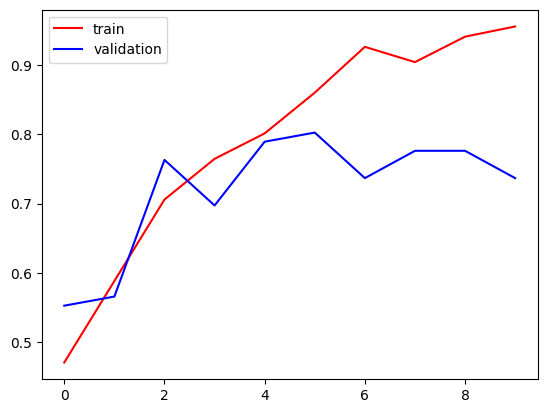

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

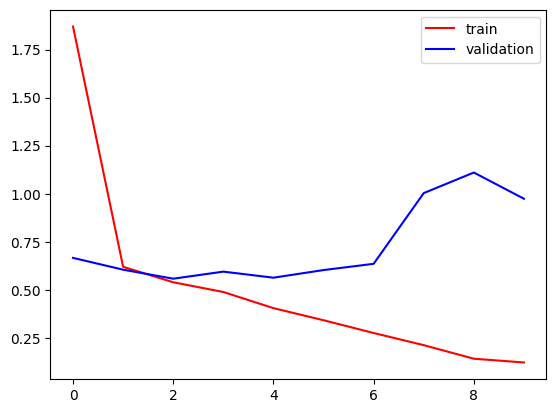

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()